# Effect of presence of a blocking layer

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

deg = np.pi/180. # conversion factor degrees to radians

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [3]:
# initialize wavelength scale and refractive indeces
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}
n_ZnS,n_Si,n_SiAs,n_Al = [{} for i in range(4)]
for band in wav.keys():
    n_ZnS[band]  = funcs.indexOfRefractionZnS(wav[band])
    n_Si[band]   = funcs.indexOfRefractionSi(wav[band])
    n_SiAs[band] = funcs.indexOfRefractionSiAs(wav[band])
    n_Al[band] = funcs.indexOfRefractionAl(wav[band])

### Test case: ZnS layer on Si layer on Si:As layer on Si blocking layer on Al substrate

In [ ]:
band = '1A'
Refl_woBlockingLayer,Transm_woBlockingLayer,Absorp_woBlockingLayer = [np.zeros(len(wav[band])) for i in range(3)]
Refl_wBlockingLayer,Transm_wBlockingLayer,Absorp_wBlockingLayer = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list_woBlockingLayer = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], n_Al[band][i]] # refractive index
    n_list_wBlockingLayer = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], n_Si[band][i], n_Al[band][i]] # refractive index
    d_list_woBlockingLayer = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    d_list_wBlockingLayer = [np.inf, 0.65e3,465e3,35e3,4e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_woBlockingLayer[i],Transm_woBlockingLayer[i],Absorp_woBlockingLayer[i] =  funcs.simple_tmm(n_list_woBlockingLayer, d_list_woBlockingLayer, 0*deg, lambda_vac)
    Refl_wBlockingLayer[i],Transm_wBlockingLayer[i],Absorp_wBlockingLayer[i] =  funcs.simple_tmm(n_list_wBlockingLayer, d_list_wBlockingLayer, 0*deg, lambda_vac)

<IPython.core.display.Javascript object>


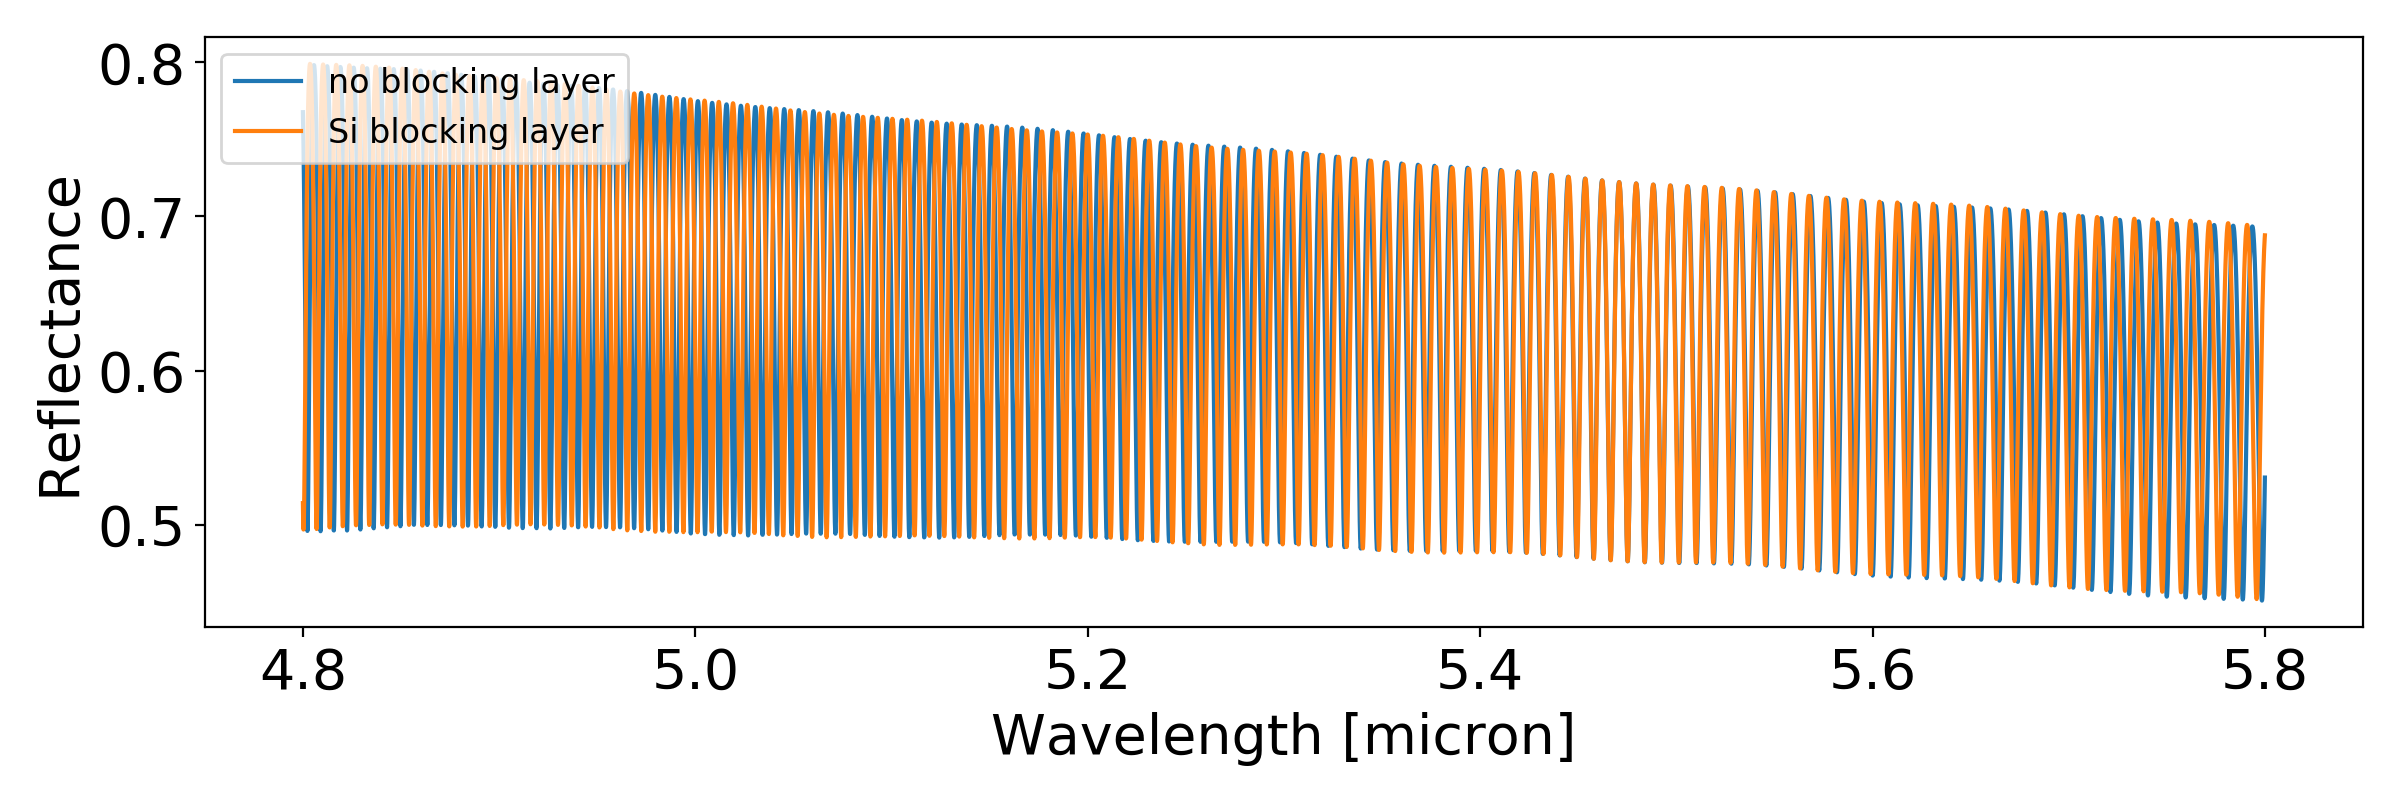

<IPython.core.display.Javascript object>


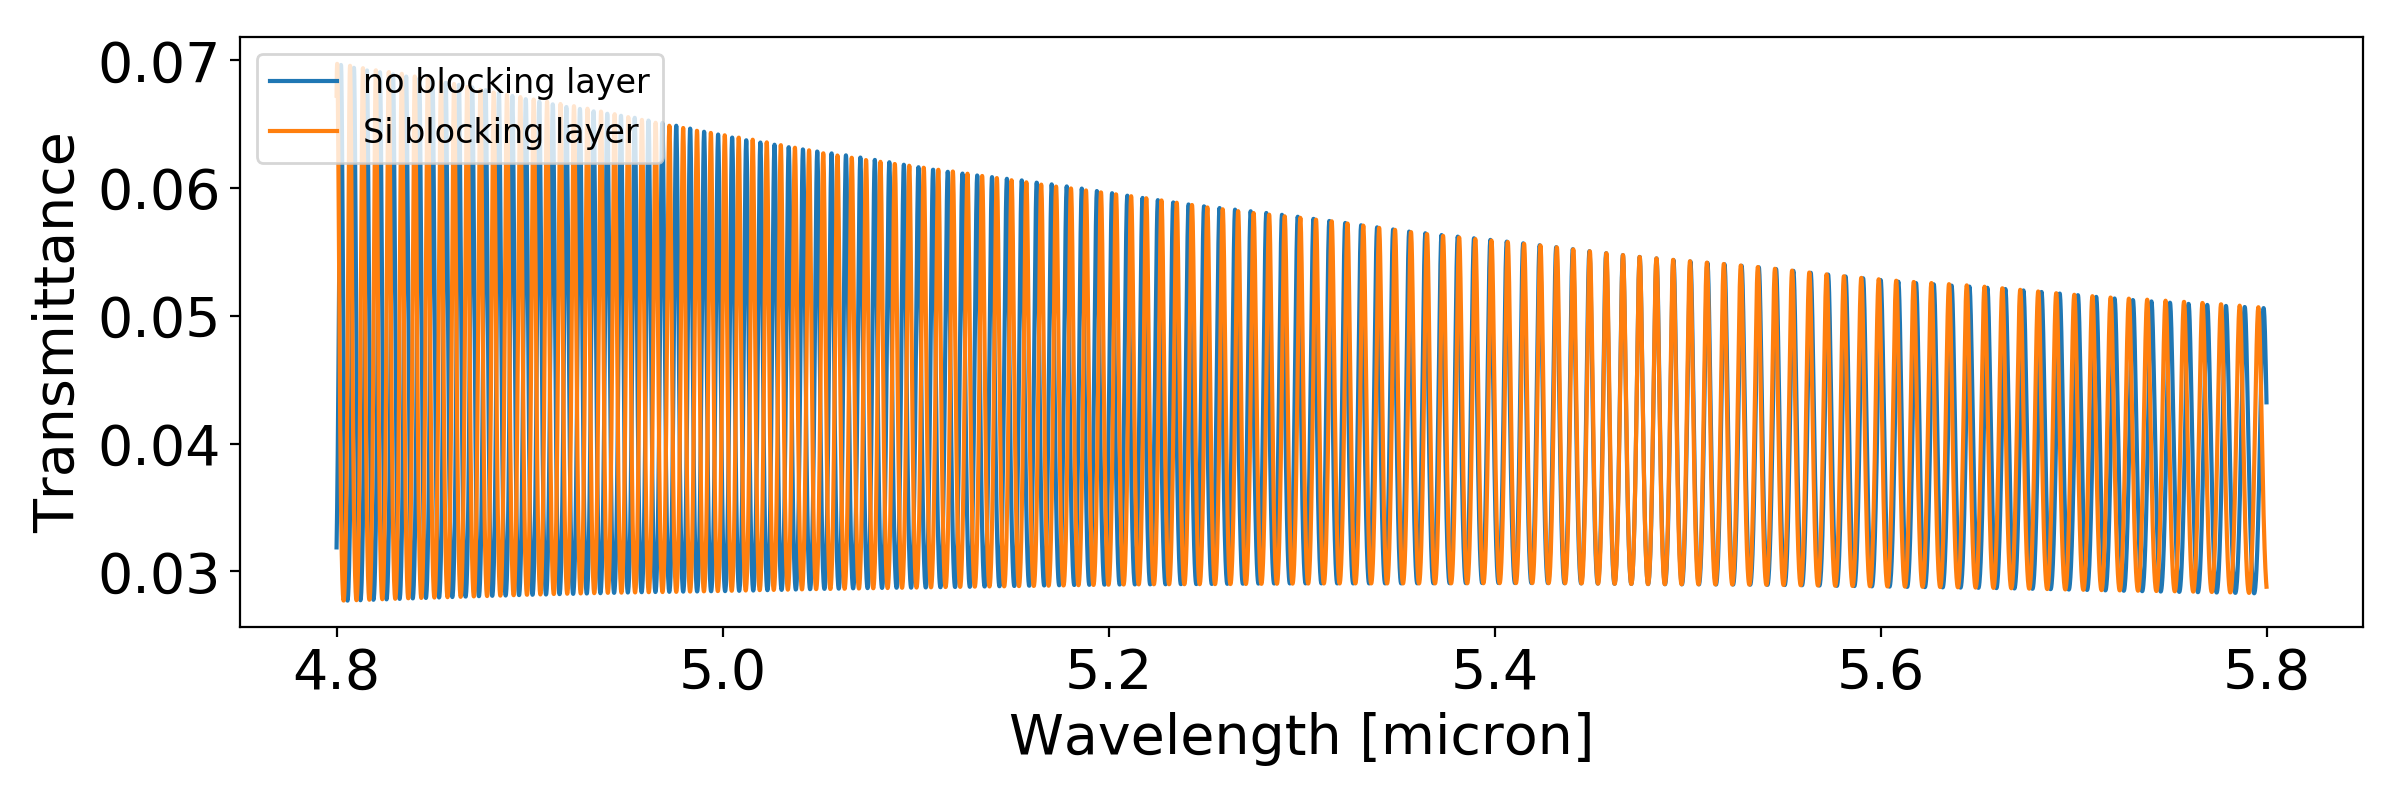

<IPython.core.display.Javascript object>


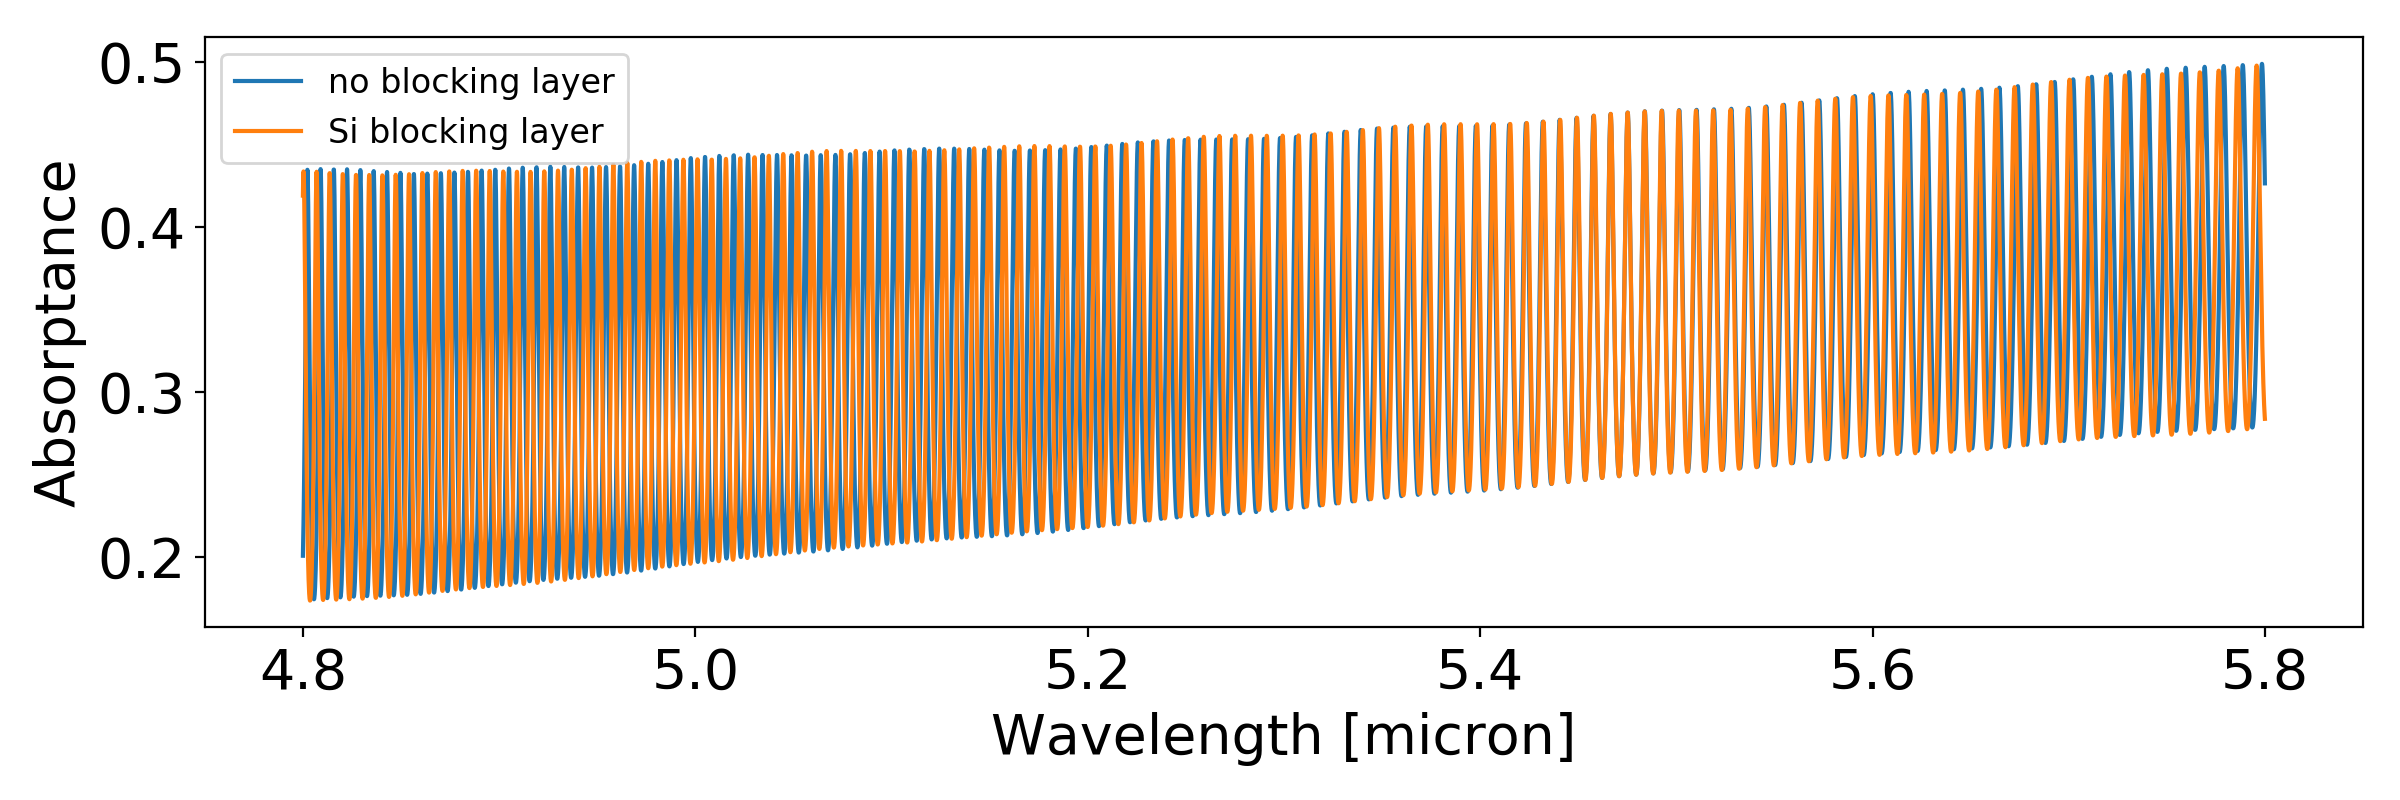

In [5]:
plt.figure(figsize=(12,4))
plt.plot(wav[band],Refl_woBlockingLayer,label='no blocking layer')
plt.plot(wav[band],Refl_wBlockingLayer,label='Si blocking layer')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Reflectance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Transm_woBlockingLayer,label='no blocking layer')
plt.plot(wav[band],Transm_wBlockingLayer,label='Si blocking layer')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Transmittance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_woBlockingLayer,label='no blocking layer')
plt.plot(wav[band],Absorp_wBlockingLayer,label='Si blocking layer')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

### Remarks:
* The presence of a blocking layer only changes the frequency of the fringes, via the increasing optical thickness that the light needs to travel through before reflecting.